In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('aqi.csv')

C:\Users\hp\AppData\Local\Temp\ipykernel_9412\3656162539.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('aqi.csv')


In [3]:
df.describe()


,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [5]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [6]:
# Require at least 4 non-NaN values in the critical columns
df.dropna(subset=['sampling_date', 'so2', 'no2', 'rspm', 'spm', 'pm2_5'], thresh=4, inplace=True)


In [7]:
df.isnull().sum()

stn_code                       134528
sampling_date                       0
state                               0
location                            0
agency                         139293
type                             4382
so2                             17044
no2                              1524
rspm                            28773
spm                            223130
location_monitoring_station     22781
pm2_5                          403158
date                                4
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412377 entries, 11 to 435738
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     277849 non-null  object 
 1   sampling_date                412377 non-null  object 
 2   state                        412377 non-null  object 
 3   location                     412377 non-null  object 
 4   agency                       273084 non-null  object 
 5   type                         407995 non-null  object 
 6   so2                          395333 non-null  float64
 7   no2                          410853 non-null  float64
 8   rspm                         383604 non-null  float64
 9   spm                          189247 non-null  float64
 10  location_monitoring_station  389596 non-null  object 
 11  pm2_5                        9219 non-null    float64
 12  date                         412373 non-null  object 
dtypes: 

In [10]:
stn_mode = df['stn_code'].mode()[0]

In [11]:
df['stn_code'].fillna(stn_mode,inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_9412\2497889202.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stn_code'].fillna(stn_mode,inplace=True)


In [12]:
df.isnull().sum()

stn_code                            0
sampling_date                       0
state                               0
location                            0
agency                         139293
type                             4382
so2                             17044
no2                              1524
rspm                            28773
spm                            223130
location_monitoring_station     22781
pm2_5                          403158
date                                4
dtype: int64

In [14]:
df['agency']

11                                              NaN
12                                              NaN
13                                              NaN
14                                              NaN
15                                              NaN
                            ...                    
435734    West Bengal State Pollution Control Board
435735    West Bengal State Pollution Control Board
435736    West Bengal State Pollution Control Board
435737    West Bengal State Pollution Control Board
435738    West Bengal State Pollution Control Board
Name: agency, Length: 412377, dtype: object

In [15]:
agency_mode = df['agency'].mode()[0]

In [16]:
df['agency'] = df['agency'].fillna(agency_mode)

In [18]:
df['type']

11        Residential, Rural and other Areas
12                           Industrial Area
13        Residential, Rural and other Areas
14        Residential, Rural and other Areas
15        Residential, Rural and other Areas
                         ...                
435734                                 RIRUO
435735                                 RIRUO
435736                                 RIRUO
435737                                 RIRUO
435738                                 RIRUO
Name: type, Length: 412377, dtype: object

In [19]:
type_mode = df['type'].mode()[0]

In [20]:
df['type']=df['type'].fillna(type_mode)

In [21]:
df['so2']

11         3.9
12         5.6
13         3.3
14         3.9
15         3.5
          ... 
435734    20.0
435735    17.0
435736    18.0
435737    22.0
435738    20.0
Name: so2, Length: 412377, dtype: float64

In [22]:
df['so2'] = df['so2'].fillna(df['so2'].mean())

In [25]:
df['no2'] = df['no2'].fillna(df['no2'].mean())

In [27]:
df['rspm'] = df['rspm'].fillna(df['rspm'].mean())

In [29]:
df['spm'] = df['spm'].fillna(df['spm'].mean())


In [31]:
df['location_monitoring_station'] = df['location_monitoring_station'].fillna(df['location_monitoring_station'].mode()[0])

In [33]:
df['pm2_5'] = df['pm2_5'].fillna(df['pm2_5'].mean())

In [34]:
df.isnull().sum()

stn_code                       0
sampling_date                  0
state                          0
location                       0
agency                         0
type                           0
so2                            0
no2                            0
rspm                           0
spm                            0
location_monitoring_station    0
pm2_5                          0
date                           4
dtype: int64

In [35]:
df

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
11,150.0,June - M061990,Andhra Pradesh,Hyderabad,Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",3.9,14.1,109.272953,133.000000,Regional Office,40.705424,06-01-1990
12,151.0,June - M061990,Andhra Pradesh,Hyderabad,Maharashtra State Pollution Control Board,Industrial Area,5.6,11.8,109.272953,82.000000,Regional Office,40.705424,06-01-1990
13,152.0,June - M061990,Andhra Pradesh,Hyderabad,Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",3.3,19.3,109.272953,111.000000,Regional Office,40.705424,06-01-1990
14,150.0,July - M071990,Andhra Pradesh,Hyderabad,Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",3.9,8.2,109.272953,118.000000,Regional Office,40.705424,07-01-1990
15,152.0,July - M071990,Andhra Pradesh,Hyderabad,Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",3.5,12.1,109.272953,135.000000,Regional Office,40.705424,07-01-1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435734,SAMP,15-12-2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,44.0,148.000000,222.272667,"Inside Rampal Industries,ULUBERIA",40.705424,12/15/2015
435735,SAMP,18-12-2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,17.0,44.0,131.000000,222.272667,"Inside Rampal Industries,ULUBERIA",40.705424,12/18/2015
435736,SAMP,21-12-2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,18.0,45.0,140.000000,222.272667,"Inside Rampal Industries,ULUBERIA",40.705424,12/21/2015
435737,SAMP,24-12-2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.000000,222.272667,"Inside Rampal Industries,ULUBERIA",40.705424,12/24/2015


In [57]:
# Convert sampling_date to datetime format for time series plots
df['date'] = pd.to_datetime(df['sampling_date'], errors='coerce')
df.dropna(subset=['date'], inplace=True)


In [58]:
df.sort_values(by='date', inplace=True)

In [59]:
df['date']

80619    1987-01-01
413279   1987-01-01
80622    1987-01-01
80621    1987-01-01
413282   1987-01-01
            ...    
56457    2015-12-12
252298   2015-12-12
80509    2015-12-12
433340   2015-12-12
434070   2015-12-12
Name: date, Length: 156369, dtype: datetime64[ns]

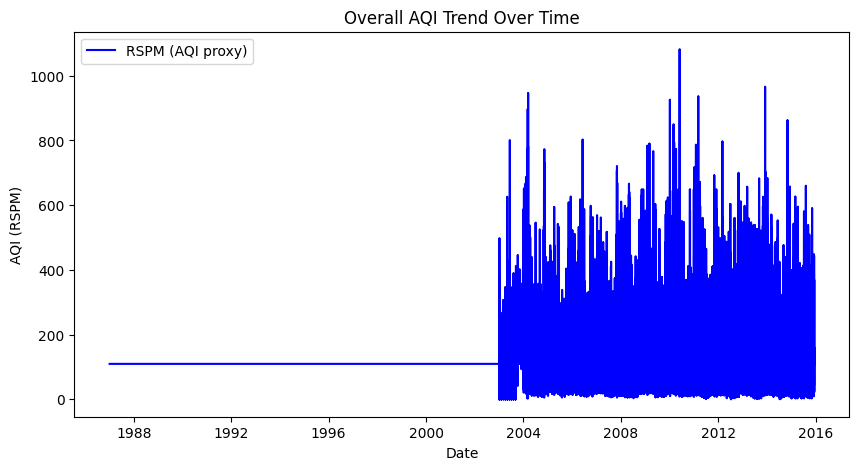

In [61]:
# 4. Line plot to visualize overall AQI trend over time (assuming rspm or spm as proxy for AQI)
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['rspm'], label='RSPM (AQI proxy)', color='blue')
plt.xlabel("Date")
plt.ylabel("AQI (RSPM)")
plt.title("Overall AQI Trend Over Time")
plt.legend()
plt.show()


In [39]:
# 3. Identify relevant variables for visualizing AQI trends
# We'll use 'date', 'so2', 'no2', 'rspm', 'spm', 'pm2_5' as main variables for pollutant trends and AQI values.


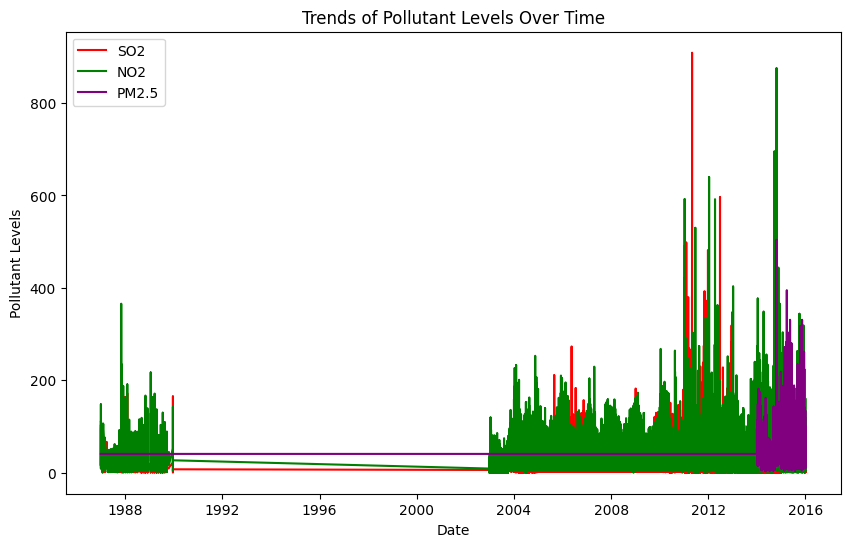

In [54]:
# 5. Plot individual pollutant levels over time
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['so2'], label='SO2', color='red')
plt.plot(df['date'], df['no2'], label='NO2', color='green')
plt.plot(df['date'], df['pm2_5'], label='PM2.5', color='purple')
plt.xlabel("Date")
plt.ylabel("Pollutant Levels")
plt.title("Trends of Pollutant Levels Over Time")
plt.legend()
plt.show()

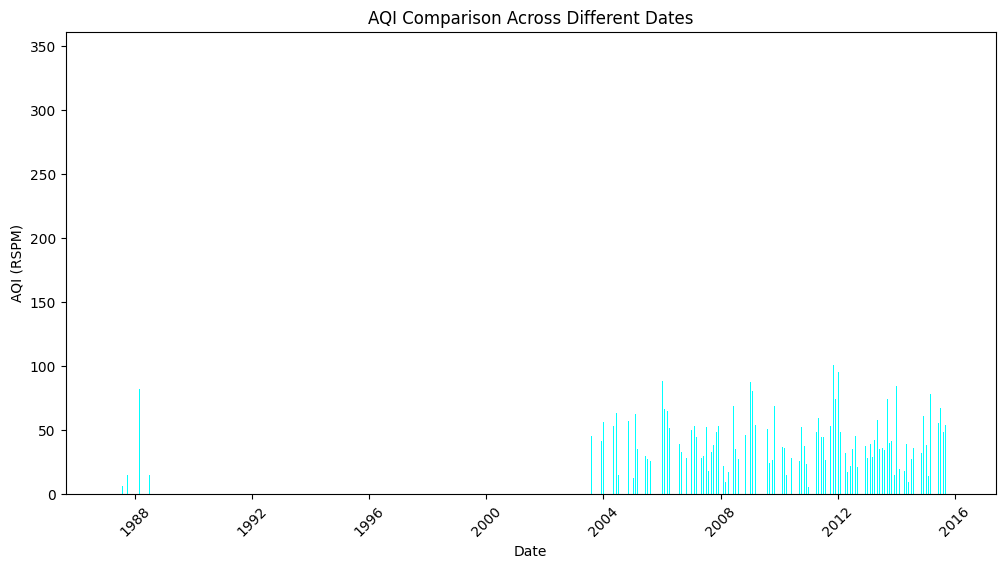

In [62]:
# 6. Bar plot to compare AQI values across different dates
# Selecting a subset of data for clarity in bar plots
subset_data = df.sample(6000)  # sample value should be greater than 8000
plt.figure(figsize=(12, 6))
plt.bar(subset_data['date'], subset_data['no2'], color='cyan')
plt.xlabel("Date")
plt.ylabel("no2")
plt.title("AQI Comparison Across Different Dates")
plt.xticks(rotation=45)
plt.show()

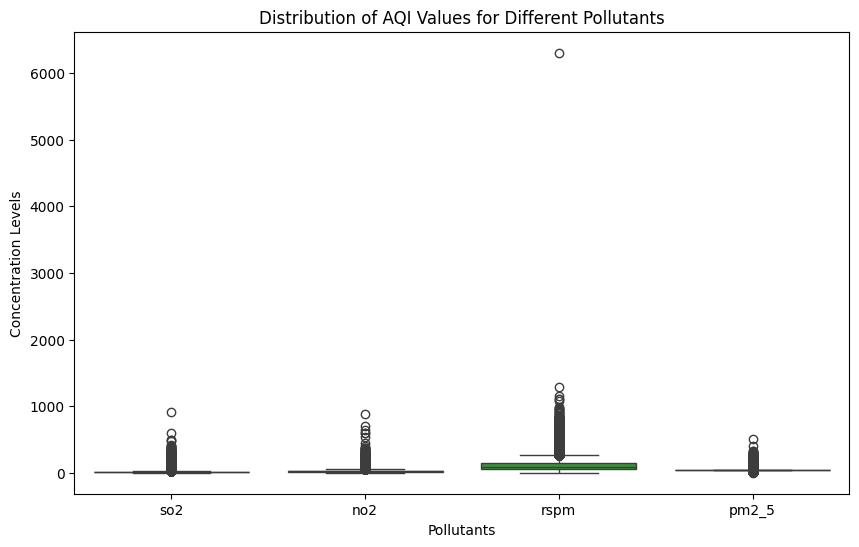

In [47]:
# 7. Box plot to analyze AQI distribution for different pollutants
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['so2', 'no2', 'rspm', 'pm2_5']])
plt.xlabel("Pollutants")
plt.ylabel("Concentration Levels")
plt.title("Distribution of AQI Values for Different Pollutants")
plt.show()

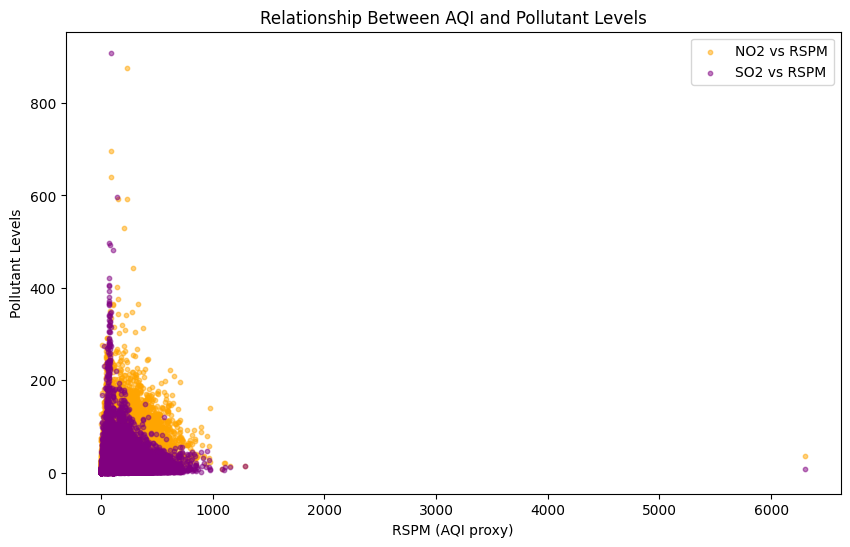

In [56]:
# 8. Scatter plot to explore the relationship between AQI and pollutant levels
plt.figure(figsize=(10, 6))
plt.scatter(df['rspm'], df['no2'], alpha=0.5, color='orange', s=10, label="NO2 vs RSPM")
plt.scatter(df['rspm'], df['so2'], alpha=0.5, color='purple', s=10, label="SO2 vs RSPM")
plt.xlabel("RSPM (AQI proxy)")
plt.ylabel("Pollutant Levels")
plt.title("Relationship Between AQI and Pollutant Levels")
plt.legend()
plt.show()

#or
# data = df[['PT08.S4(NO2)', 'PT08.S5(O3)', 'PT08.S1(CO)']]
# plt.ylabel("Population level")
# plt.xlabel("AQI")
# sns.scatterplot(data)

In [2]:
#practice


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('aqi.csv')

C:\Users\hp\AppData\Local\Temp\ipykernel_5352\3656162539.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('aqi.csv')


In [4]:
df

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,02-01-1990
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,02-01-1990
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,02-01-1990
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,03-01-1990
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,03-01-1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/24/2015
435738,SAMP,29-12-2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/29/2015
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [7]:
df.shape

(435742, 13)

In [8]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [11]:
df['stn_code'] = df['stn_code'].fillna(df['stn_code'].mode()[0])

In [12]:
df.isnull().sum()

stn_code                            0
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [16]:
df['agency'] = df['agency'].fillna(df['agency'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])
df['so2'] = df['so2'].fillna(df['so2'].mean())
df['no2'] = df['no2'].fillna(df['no2'].mean())
df['rspm'] = df['rspm'].fillna(df['rspm'].mean())
df['spm'] = df['spm'].fillna(df['spm'].mean())
df['location_monitoring_station'] = df['location_monitoring_station'].fillna(df['location_monitoring_station'].mode()[0])
df['pm2_5'] = df['pm2_5'].fillna(df['pm2_5'].mean())
df['location'] = df['location'].fillna(df['location'].mode()[0])

In [17]:
df.isnull().sum()

stn_code                       0
sampling_date                  3
state                          0
location                       0
agency                         0
type                           0
so2                            0
no2                            0
rspm                           0
spm                            0
location_monitoring_station    0
pm2_5                          0
date                           7
dtype: int64

In [20]:
df['date'] = pd.to_datetime(df['sampling_date'],errors='coerce')
df.dropna(subset=['date'] , inplace=True)

# # Convert sampling_date to datetime format for time series plots



C:\Users\hp\AppData\Local\Temp\ipykernel_5352\2930796967.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['sampling_date'],errors='coerce')


In [21]:
df.sort_values(by='date',inplace=True)

In [22]:
df['date']

413279   1987-01-01
413276   1987-01-01
318050   1987-01-01
318053   1987-01-01
80621    1987-01-01
            ...    
45539    2015-12-31
80102    2015-12-31
266887   2015-12-31
266513   2015-12-31
288524   2015-12-31
Name: date, Length: 412695, dtype: datetime64[ns]

In [23]:
df.isnull().sum()

stn_code                       0
sampling_date                  0
state                          0
location                       0
agency                         0
type                           0
so2                            0
no2                            0
rspm                           0
spm                            0
location_monitoring_station    0
pm2_5                          0
date                           0
dtype: int64

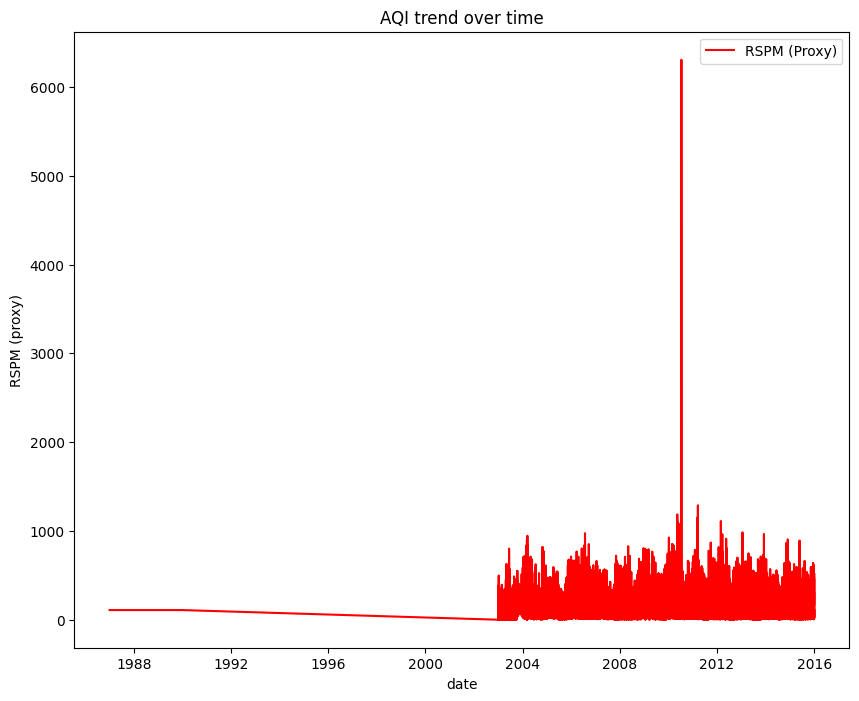

In [28]:
# visulalizing AQI over trend

plt.figure(figsize=(10,8))
plt.plot(df['date'],df['rspm'] , label='RSPM (Proxy)' , color='red')
plt.xlabel('date')
plt.ylabel('RSPM (proxy)')
plt.title('AQI trend over time')
plt.legend()
plt.show()


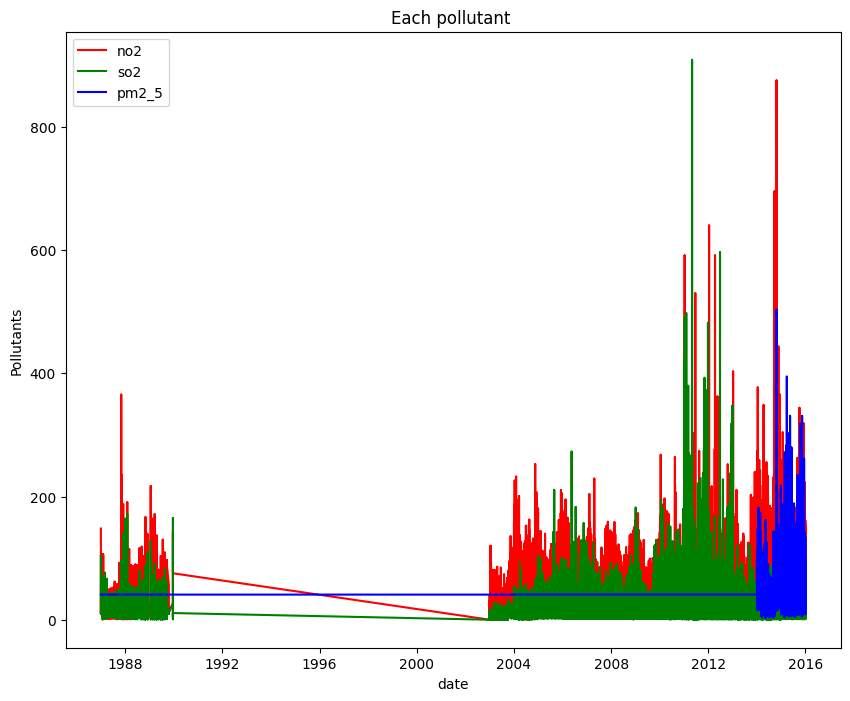

In [29]:
# visualizing for each pollutant levels
plt.figure(figsize=(10,8))
plt.plot(df['date'],df['no2'], label="no2",color='red')
plt.plot(df['date'],df['so2'] , label='so2' , color='green')
plt.plot(df['date'],df['pm2_5'] , label='pm2_5' , color='blue')
plt.xlabel('date')
plt.ylabel('Pollutants')
plt.title('Each pollutant trends over time ')
plt.legend()
plt.show()

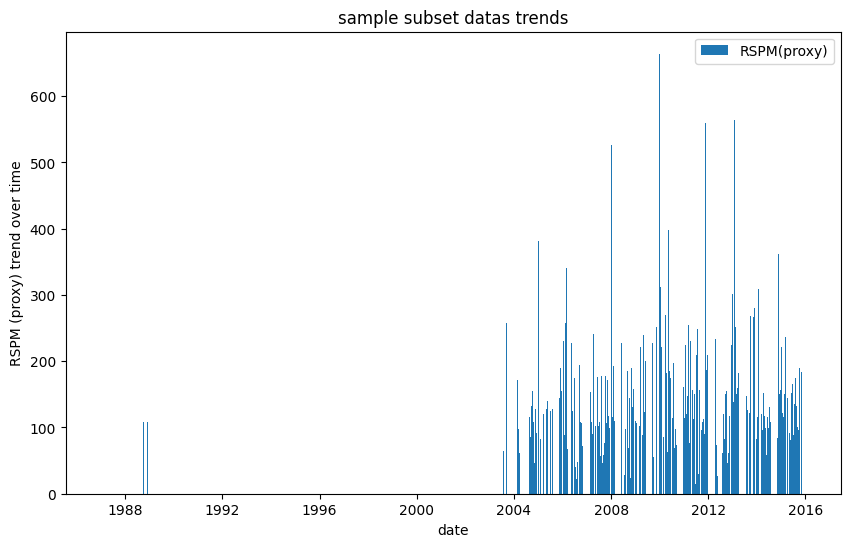

In [30]:
# smaple data
subset_sample = df.sample(8000)
plt.figure(figsize=(10,6))
plt.bar(subset_sample['date'] , subset_sample['rspm'] , label = 'RSPM(proxy)' )
plt.xlabel('date')
plt.ylabel('RSPM (proxy) trend over time')
plt.title('sample subset datas trends')
plt.legend()
plt.show()

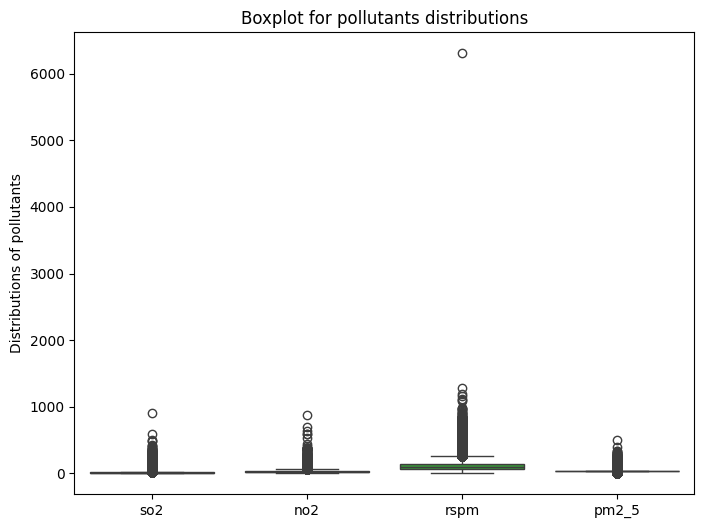

In [34]:
# boxplot for distributions of trends

plt.figure(figsize=(8,6))
sns.boxplot(data=df[['so2' , 'no2' , 'rspm' , 'pm2_5']] )
# must use sns not plt because plt requires two positional arguments
plt.ylabel('Concentration Levels')
plt.title('Boxplot for pollutants distributions')
plt.show()

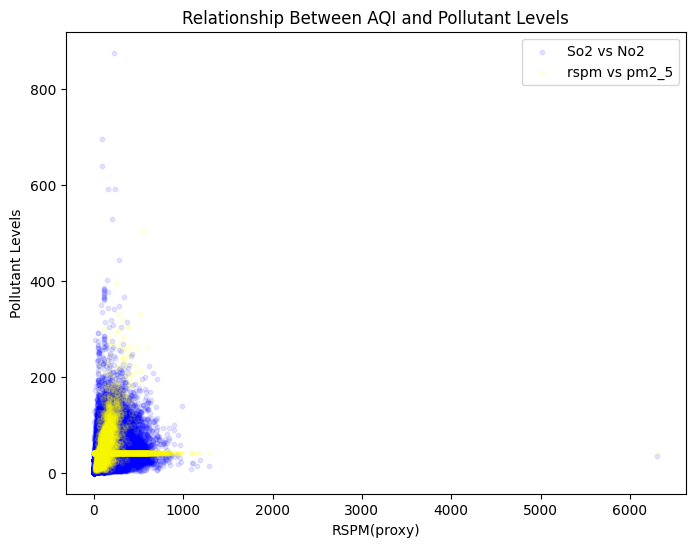

In [38]:
# scatter plot 

plt.figure(figsize=(8,6))
plt.scatter(df['rspm'] , df['no2'] , alpha=0.1 , s=10 , color='blue'  , label='So2 vs No2')
plt.scatter(df['rspm'] , df['pm2_5'] , alpha = 0.1 , s = 10 , color='yellow' , label = 'rspm vs pm2_5')
plt.xlabel('RSPM(proxy)')
plt.ylabel('Pollutant Levels')
plt.title('Relationship Between AQI and Pollutant Levels')
plt.legend()
plt.show()

In [ ]:
# 8. Scatter plot to explore the relationship between AQI and pollutant levels
plt.figure(figsize=(10, 6))
plt.scatter(df['rspm'], df['no2'], alpha=0.5, color='orange', s=10, label="NO2 vs RSPM")
plt.scatter(df['rspm'], df['so2'], alpha=0.5, color='purple', s=10, label="SO2 vs RSPM")
plt.xlabel("RSPM (AQI proxy)")
plt.ylabel("Pollutant Levels")
plt.title("Relationship Between AQI and Pollutant Levels")
plt.legend()
plt.show()

#or
# data = df[['PT08.S4(NO2)', 'PT08.S5(O3)', 'PT08.S1(CO)']]
# plt.ylabel("Population level")
# plt.xlabel("AQI")
# sns.scatterplot(data)